In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
customers = pd.read_csv('Ecommerce_Customers.csv')

In [ ]:
customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#Data Preprocessing

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 1100 non-null   object 
 1   Address               1100 non-null   object 
 2   Avatar                1040 non-null   object 
 3   Avg. Session Length   1040 non-null   float64
 4   Time on App           1040 non-null   float64
 5   Time on Website       1100 non-null   float64
 6   Length of Membership  1040 non-null   float64
 7   Yearly Amount Spent   1040 non-null   float64
dtypes: float64(5), object(3)
memory usage: 68.9+ KB


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,1040.000000,1040.000000,1100.000000,1040.000000,1040.000000
mean,33.047107,12.047651,37.064312,3.512963,497.522424
std,0.998732,0.982761,0.995390,1.001251,78.597010
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.332637,11.409645,36.375066,2.939952,444.582165
50%,33.075703,11.980553,37.067090,3.506968,497.161502
75%,33.717555,12.725909,37.712509,4.093134,547.451353
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.isnull().sum()

,0
Email,0
Address,0
Avatar,60
Avg. Session Length,60
Time on App,60
Time on Website,0
Length of Membership,60
Yearly Amount Spent,60


In [ ]:
df_cleaned=customers=customers.dropna(subset=['Avatar','Avg. Session Length','Time on App','Length of Membership','Yearly Amount Spent'])
df_cleaned.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


# Splitting the Data

In [ ]:
X = df_cleaned[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df_cleaned['Yearly Amount Spent']

In [ ]:
X.head()
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Training the Model with multivariable regression using Scikit Learn

In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output (yearly expenditure). As the plots suggested, we find that the most important coefficient is that of the "Length of Membership" predictor, followed by the 'Time on App' and the 'Avg. Session Length'. The time on website does not seem to be an important factor to the amount a customer spends per year.

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# the coefficients
lm.coef_

array([26.03918398, 38.85747714,  0.38475873, 62.08092152])

In [ ]:
# r squared
lm.score(X, y)

0.9833643585897085

In [ ]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   26.039184
Time on App           38.857477
Time on Website        0.384759
Length of Membership  62.080922


# Training the model with multivariable regression using OLS

In [ ]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     8251.
Date:                 Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                         17:04:25   Log-Likelihood:                -2228.8
No. Observations:                  597   AIC:                             4468.
Df Residuals:                      592   BIC:                             4490.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

# Predicting Test Data

Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [ ]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

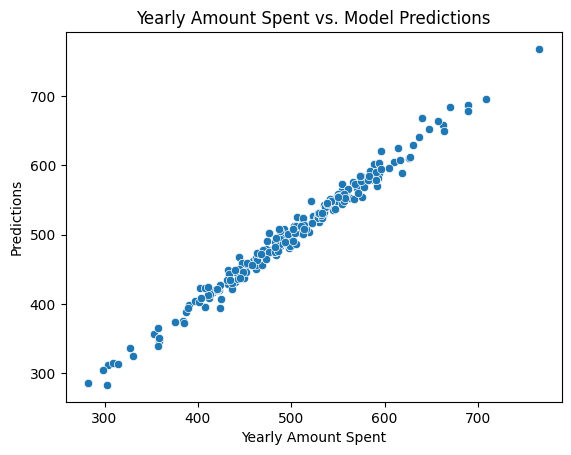

In [ ]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=predictions) # Pass y_test and predictions as keyword arguments 'x' and 'y' respectively
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

# Evaluation of the model

#Residuals

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.7604864491691545
Mean Squared Error: 97.2144836970151
Root Mean Squared Error: 9.859740549173447


Distribution plot of the residuals of the model's predictions. They should be normally distributed.

<ipython-input-102-b87d825c292e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

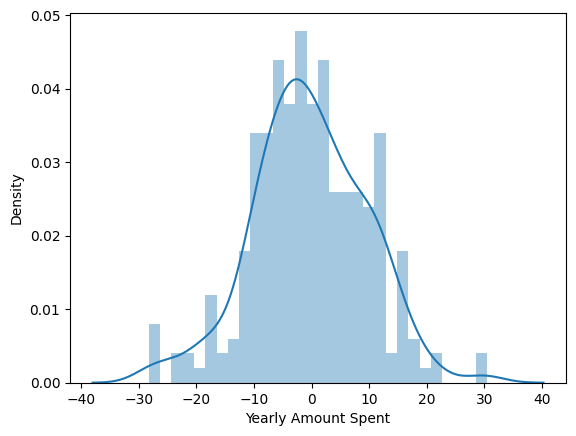

In [ ]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

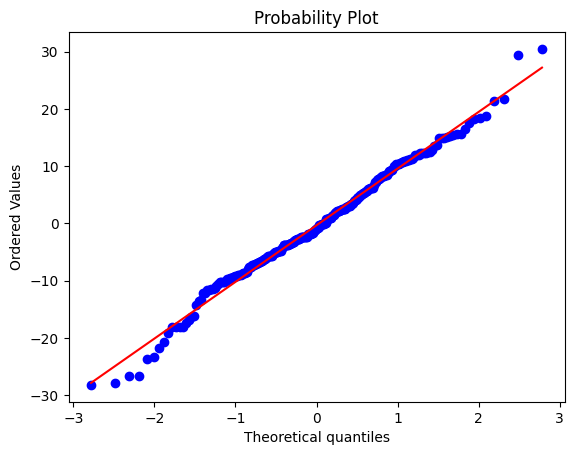

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# Conclusion


It can be tricky to interpret the information in this analysis. According to the model, the most significant factor for clients is not the time spent on the app or website, but their length of membership. However, of the two predictors (desktop vs app), the app has the strongest influence by far. In fact, the time spent on the desktop website does not seem to have any correlation at all! In other words, according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend.

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. Indeed, the interpretation of this information requires expertise in the online marketing sphere. Our analysis and our model, however, does a very good job in weighting the predictors importance.